In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
!pip install ipython-autotime
%load_ext autotime


# import scispacy
# import spacy

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.42 s


In [0]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.15 ms


In [0]:
data = pd.read_csv('/content/drive/My Drive/ontosamples.csv', usecols=['text', 'label'],encoding="ISO-8859-1")

# model.save('/content/drive/My Drive/ontosamples.csv')

# data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396220 entries, 0 to 396219
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    396220 non-null  object
 1   label   396220 non-null  object
dtypes: object(2)
memory usage: 6.0+ MB
time: 522 ms


Labelcount: 396220

Category of labels

anatomy    209948
drug       112120
problem     74152
Name: label, dtype: int64


Text(0.5, 1.0, 'Type of texts')

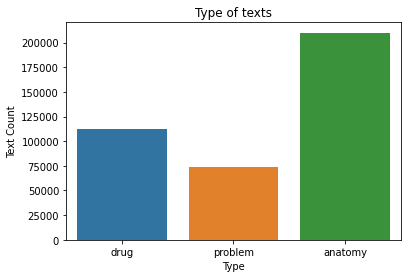

time: 254 ms


In [0]:

print("Labelcount:",len(data.index))
print("\nCategory of labels\n")
print(data.label.value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data.label)
plt.xlabel("Type")
plt.ylabel("Text Count")
plt.title("Type of texts")




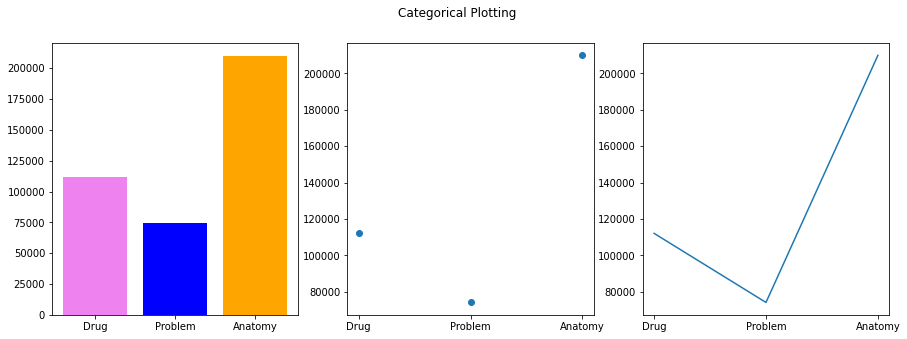

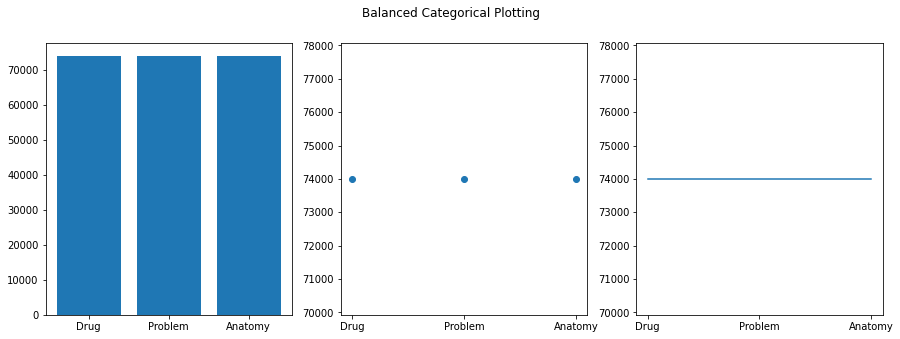

time: 731 ms


In [0]:
names = ['Drug', 'Problem', 'Anatomy']
values = [112120, 74152, 209948]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(names, values,color=['violet','blue','orange'])
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


print("\n")

names = ['Drug', 'Problem', 'Anatomy']
values = [74000, 74000, 74000]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Balanced Categorical Plotting')
plt.show()



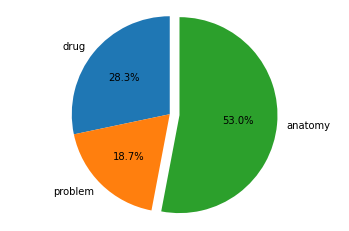

time: 60.5 ms


In [0]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'drug', 'problem', 'anatomy'
sizes = [112120,74152,209948]
# explode = (0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,explode = (0, 0, 0.1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [0]:
num_of_categories =74000
shuffled = data.reindex(np.random.permutation(data.index))
drug = shuffled[shuffled['label'] == 'drug'][:112120]
problem = shuffled[shuffled['label'] == 'problem'][:74152]
anatomy = shuffled[shuffled['label'] == 'anatomy'][:209948]
# severity = shuffled[shuffled['label'] == 'severity'][:num_of_categories]
concated = pd.concat([drug,problem,anatomy],ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

time: 313 ms


In [0]:
#One-hot encode the lab
concated.loc[concated['label'] == 'drug', 'LABEL'] = 0
concated.loc[concated['label'] == 'problem', 'LABEL'] = 1
concated.loc[concated['label'] == 'anatomy', 'LABEL'] = 2
# concated.loc[concated['label'] == 'severity', 'LABEL'] = 3
print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=3)
print(labels[:10])
# print(concated.keys())
if 'label' in concated.keys():
    concated.drop(['label'], axis=1)

172595    1
298498    2
198389    2
318466    2
205682    2
247240    2
271019    2
83134     0
380430    2
126030    1
Name: LABEL, dtype: int64
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
time: 138 ms


In [0]:
n_most_common_words = 15000
max_len=200
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['text'].values)
sequences = tokenizer.texts_to_sequences(concated['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)
X.shape[1]

ERROR! Session/line number was not unique in database. History logging moved to new session 60
Found 39344 unique tokens.


200

time: 12.4 s


In [0]:

X_train, X_test, y_train, y_test = train_test_split(X,labels,test_size=0.30,random_state=42)
# print(X_train)
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

# print(X_train[8])

((277354, 200), (277354, 3), (118866, 200), (118866, 3))
time: 239 ms


In [0]:
epochs = 1
emb_dim = 100
batch_size = 64
# labels[:3]

time: 1.68 ms


In [0]:

import random

random.seed(134)
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.00001)])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 100)          1500000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 1,617,635
Trainable params: 1,617,635
Non-trainable params: 0
_________________________________________________________________
None
3467/3467 [==============================] - 2563s 739ms/step - loss: 0.0734 - acc: 0.9721 - val_loss: 0.0399 - val_acc: 0.9827
time: 42min 46s


In [0]:

results = model.evaluate(X_train,y_train)
print('Final train set loss: {:4f}'.format(results[0]))
print('Final train set accuracy: {:4f}'.format(results[1]))

results1 = model.evaluate(X_test,y_test)

print('Final test set loss: {:4f}'.format(results1[0]))
print('Final test set accuracy: {:4f}'.format(results1[1]))


277354/277354 [==============================] - 543s 2ms/step
Final train set loss: 0.022977
Final train set accuracy: 0.990737
118866/118866 [==============================] - 231s 2ms/step
Final test set loss: 0.037886
Final test set accuracy: 0.986573
time: 12min 53s


In [0]:
y_pred=model.predict(X_test)


time: 3min 31s


In [0]:

y_pred= y_pred>0.8
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test,y_pred,average='micro'))



(0.9931005612577134, 0.9617567567567568, 0.9771773787548247, None)
time: 57.7 ms


The confusion matrix is 
 
[[22072   140    25]
 [  859 21325    60]
 [  257    56 21806]]


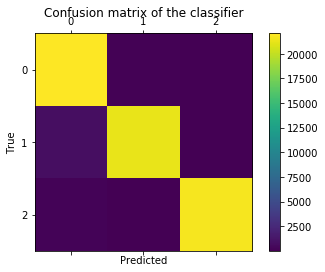

0.9809159159159159

time: 253 ms


In [0]:

cm=confusion_matrix( y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('The confusion matrix is \n ')
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)

plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




In [0]:
print("The recall and precision for each class")

recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print(recall,precision)

print("The Overall  pecision and recall ")

from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test,y_pred,average='micro'))


The recall and precision for each class
[0.99257993 0.95868549 0.98584927] [0.95187166 0.99089262 0.99611713]
The Overall  pecision and recall 
(0.9931005612577134, 0.9617567567567568, 0.9771773787548247, None)
time: 55.6 ms


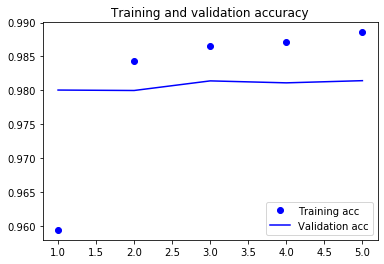

<Figure size 432x288 with 0 Axes>

time: 200 ms


In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot( epochs,acc, 'bo', label='Training acc')
plt.plot( epochs,val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

plt.show()

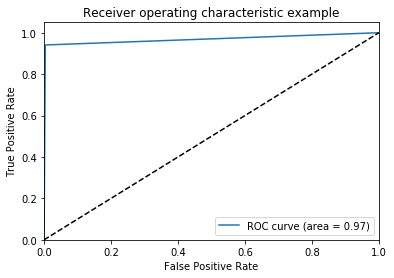

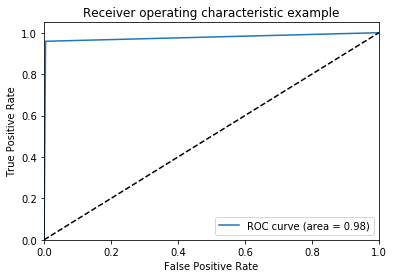

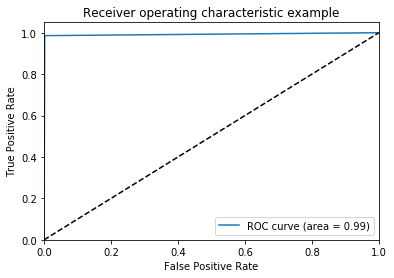

time: 668 ms


In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt


n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()



In [0]:
from sklearn.metrics import log_loss
print(log_loss(y_test,y_pred))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.26545102892666295
0.9792287645507362
time: 76.2 ms


In [0]:
model.save_weights('/content/drive/My Drive/Colab/lastlstm.h5')

time: 137 ms


In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')
grammar = (''' NP: {<DT>?<JJ>*<NN>} # NP ''')
chunkParser = nltk.RegexpParser(grammar)
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

time: 1.31 s


In [0]:
! tar xvzf '/content/drive/My Drive/Colab/en_core_sci_sm-0.2.3.tar.gz'

en_core_sci_sm-0.2.3/
en_core_sci_sm-0.2.3/en_core_sci_sm/
en_core_sci_sm-0.2.3/en_core_sci_sm/meta.json
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/parser/
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/parser/model
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/parser/moves
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/parser/cfg
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/tagger/
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/tagger/tag_map
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/tagger/model
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/tagger/cfg
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/ner/
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/ner/model
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/ner/moves
en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3/ner/cfg
en_core_sci_sm-0.2.3/en_core

In [0]:


nlp = spacy.load("/content/drive/My Drive/Colab/en_core_sci_sm-0.2.3/en_core_sci_sm/en_core_sci_sm-0.2.3")
text ="bisphosphonate is given to femur bone for osteonecrosis"
doc = nlp(text)

doc.ents



(bisphosphonate, femur bone, osteonecrosis)

time: 8 s


In [0]:

lst=[]
b=([x.text for x in doc.ents])
for x in b:
  
# print(text.find(x))
  txt =[x]
  seq = tokenizer.texts_to_sequences(txt)
  padded = pad_sequences(seq, maxlen=max_len)
  pred = model.predict(padded)
  labels = ['Drug','Problem','Anatomy']
  
  if(pred.max()>0.00):
    print('Text         :',x)
    print('START offset :',text.find(x))
    print('END offset   :',text.find(x)+len(x))
    print('Confidence   :',(pred.max()))
    print('Semantics    :',labels[np.argmax(pred)])
    print('POS Tag      :',nltk.pos_tag(nltk.word_tokenize(x)))


    if(labels[np.argmax(pred)]=='Problem'):
      sentiment='Negative'
      print('Sentiment    :',sentiment)
    else:
      sentiment='Neutral'
      print('Sentiment    :',sentiment)

    print('\n')


Text         : bisphosphonate
START offset : 0
END offset   : 14
Confidence   : 0.5635185
Semantics    : Drug
POS Tag      : [('bisphosphonate', 'NN')]
Sentiment    : Neutral


Text         : femur bone
START offset : 27
END offset   : 37
Confidence   : 0.99956137
Semantics    : Anatomy
POS Tag      : [('femur', 'NN'), ('bone', 'NN')]
Sentiment    : Neutral


Text         : osteonecrosis
START offset : 42
END offset   : 55
Confidence   : 0.9998752
Semantics    : Problem
POS Tag      : [('osteonecrosis', 'NN')]
Sentiment    : Negative


time: 187 ms
